# Explore ranchi venues

To update the csv to be used in this notebook:
- Run List of villages ranchi.ipynb
- Then Four Square for Ranchi.ipynb

In [1]:
import pandas as pd
import numpy as np

In [2]:
# use above function to get venues nearby toronto
# function takes a lot of time
ranchi_venues = pd.read_csv('delhi_venues.csv',index_col = 0)
ranchi_venues.head()

,Village,Village Latitude,Village Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Summary,Venue Type
0,Narela,28.6964,77.127098,McDonald's,28.701568,77.120081,Fast Food Restaurant,This spot is popular,general
1,Narela,28.6964,77.127098,Domino's Pizza,28.701000,77.124000,Pizza Place,This spot is popular,general
2,Narela,28.6964,77.127098,Kaleva,28.702346,77.133520,Fast Food Restaurant,This spot is popular,general
3,Narela,28.6964,77.127098,Aggarwal City Plaza,28.699558,77.118283,Shopping Mall,This spot is popular,general
4,Narela,28.6964,77.127098,Shake square,28.700417,77.135447,Ice Cream Shop,This spot is popular,general


In [3]:
# see number of venues per neighbourhood
ranchi_venues.groupby('Village').count().head()

,Village Latitude,Village Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Summary,Venue Type
Village,,,,,,,,
Chanakya Puri,12,12,12,12,12,12,12,12
Civil Lines,45,45,45,45,45,45,45,45
Connaught Place,86,86,86,86,86,86,86,86
Darya Ganj,15,15,15,15,15,15,15,15
Defence Colony,53,53,53,53,53,53,53,53


In [3]:
# one hot encoding
ranchi_onehot = pd.get_dummies(ranchi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ranchi_onehot['Village'] = ranchi_venues['Village'] 

# move neighborhood column to the first column
fixed_columns = [ranchi_onehot.columns[-1]] + list(ranchi_onehot.columns[:-1])
ranchi_onehot = ranchi_onehot[fixed_columns]

ranchi_onehot['City'] = 'Delhi'
ranchi_onehot.head()

,Village,ATM,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Stadium,Tapas Restaurant,Tea Room,Theater,Tibetan Restaurant,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,City
0,Narela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
1,Narela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
2,Narela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
3,Narela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
4,Narela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi


In [27]:
# group the data per neighborhood
ranchi_grouped = ranchi_onehot.groupby('City').sum().reset_index()
ranchi_grouped = ranchi_grouped.transpose()
ranchi_grouped.columns = ranchi_grouped.iloc[0]
ranchi_grouped.drop(ranchi_grouped.index[[0]],inplace=True)
ranchi_grouped.head()


City,Delhi
ATM,1
Afghan Restaurant,1
American Restaurant,4
Arcade,1
Art Gallery,4


In [38]:
ranchi_grouped.sort_values(['Delhi'],ascending=False,inplace=True)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

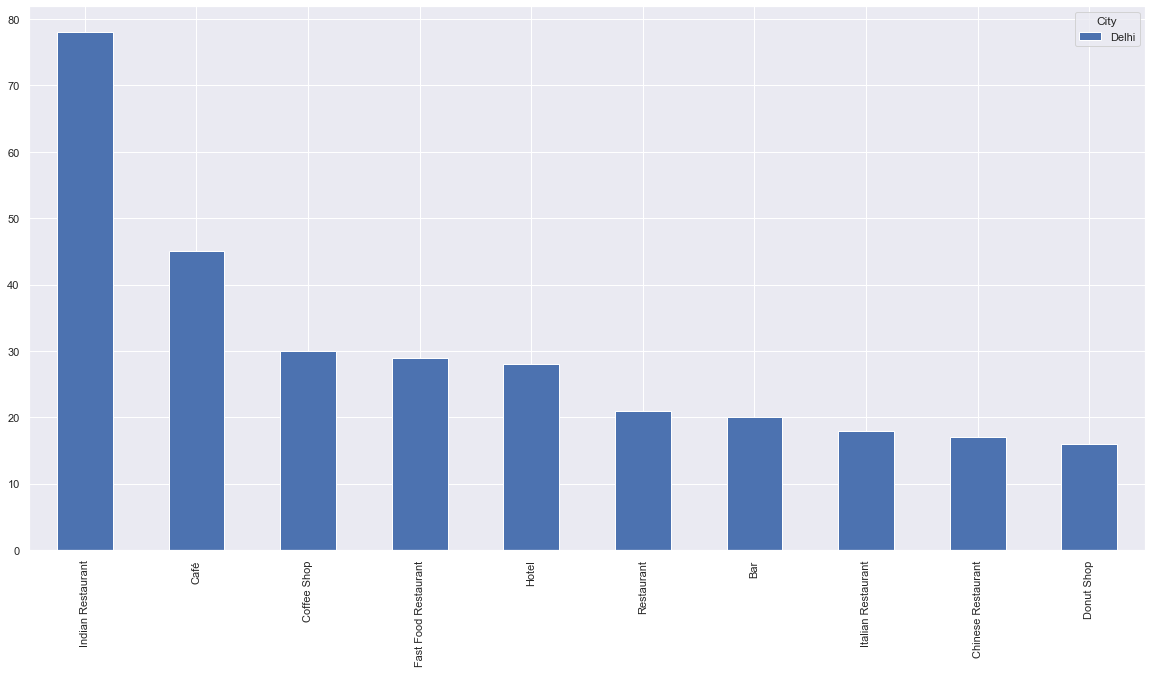

In [51]:
ranchi_grouped.iloc[0:10].plot(kind='bar',figsize=(20,10))

In [154]:
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [155]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Village']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Village'] = ranchi_grouped['Village']

for ind in np.arange(ranchi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ranchi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakya Puri,Indian Restaurant,Asian Restaurant,Park,Moroccan Restaurant,Café,Pub,Karnataka Restaurant,Nightclub,Chinese Restaurant,Flea Market
1,Civil Lines,Indian Restaurant,Fast Food Restaurant,Donut Shop,Café,Park,Coffee Shop,Multiplex,Clothing Store,Restaurant,Shopping Mall
2,Connaught Place,Indian Restaurant,Hotel,Café,Bar,Coffee Shop,Chinese Restaurant,Lounge,Fast Food Restaurant,Asian Restaurant,BBQ Joint
3,Darya Ganj,Indian Restaurant,Hotel,Restaurant,History Museum,Asian Restaurant,Hostel,Movie Theater,Cricket Ground,Road,Food Truck
4,Defence Colony,Indian Restaurant,Italian Restaurant,Café,Market,Food Truck,Pizza Place,Bakery,Sandwich Place,French Restaurant,Fast Food Restaurant


# Finding optimal k

In [156]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

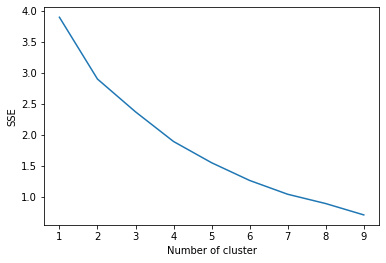

In [157]:
ranchi_grouped_clustering = ranchi_grouped.drop('Village', 1)

sse = {}
for k in range(1, 10):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0,max_iter = 1000).fit(ranchi_grouped_clustering)
    ranchi_grouped_clustering["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Clustering on basis of most common venues

In [179]:
# set number of clusters
kclusters = 2

ranchi_grouped_clustering = ranchi_grouped.drop('Village', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ranchi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
df = pd.read_csv('delhi_tehsil.csv',index_col=0)
df.head()

,Village,District,City,Latitude,Longitude
0,Narela,North West *,Delhi,28.696400,77.127098
1,Civil Lines,North *,Delhi,28.642963,77.115875
2,Seelam Pur,North East *,Delhi,28.689500,77.297490
3,Gandhi Nagar,East *,Delhi,28.450411,77.011429
4,Parliament Street,New Delhi,Delhi,28.630951,77.217278


In [181]:
# add clustering labels
neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1,inplace= True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ranchi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ranchi_merged = ranchi_merged.join(neighborhoods_venues_sorted.set_index('Village'), on='Village')

# drop the column with nan values after join
ranchi_merged.dropna(inplace=True)

ranchi_merged.head() # check the last columns!

,Village,District,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Narela,North West *,Delhi,28.696400,77.127098,0.0,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gym,Shopping Mall,Fried Chicken Joint,Donut Shop,Electronics Store,Event Space,Flea Market
1,Civil Lines,North *,Delhi,28.642963,77.115875,0.0,Indian Restaurant,Fast Food Restaurant,Donut Shop,Café,Park,Coffee Shop,Multiplex,Clothing Store,Restaurant,Shopping Mall
2,Seelam Pur,North East *,Delhi,28.689500,77.297490,0.0,Indian Restaurant,Ice Cream Shop,Clothing Store,Wine Bar,Garden,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Food & Drink Shop
3,Gandhi Nagar,East *,Delhi,28.450411,77.011429,0.0,Donut Shop,Electronics Store,Indian Restaurant,Resort,Football Stadium,Café,Garden,Event Space,Fast Food Restaurant,Flea Market
4,Parliament Street,New Delhi,Delhi,28.630951,77.217278,0.0,Indian Restaurant,Café,Hotel,Coffee Shop,Chinese Restaurant,Bar,Lounge,Fast Food Restaurant,Asian Restaurant,BBQ Joint


In [166]:
ranchi_merged.head()

,Village,District,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Narela,North West *,Delhi,28.696400,77.127098,0.0,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gym,Shopping Mall,Fried Chicken Joint,Donut Shop,Electronics Store,Event Space,Flea Market
1,Civil Lines,North *,Delhi,28.642963,77.115875,0.0,Indian Restaurant,Fast Food Restaurant,Donut Shop,Café,Park,Coffee Shop,Multiplex,Clothing Store,Restaurant,Shopping Mall
2,Seelam Pur,North East *,Delhi,28.689500,77.297490,0.0,Indian Restaurant,Ice Cream Shop,Clothing Store,Wine Bar,Garden,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Food & Drink Shop
3,Gandhi Nagar,East *,Delhi,28.450411,77.011429,0.0,Donut Shop,Electronics Store,Indian Restaurant,Resort,Football Stadium,Café,Garden,Event Space,Fast Food Restaurant,Flea Market
4,Parliament Street,New Delhi,Delhi,28.630951,77.217278,0.0,Indian Restaurant,Café,Hotel,Coffee Shop,Chinese Restaurant,Bar,Lounge,Fast Food Restaurant,Asian Restaurant,BBQ Joint


In [167]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [168]:
# setup ranchi coordinates
rnc_latitude = 28.7041
rnc_longitude = 77.1025

In [182]:
# create map
map_clusters = folium.Map(location=[rnc_latitude, rnc_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ranchi_merged['Latitude'], ranchi_merged['Longitude'], ranchi_merged['Village'], ranchi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [183]:
# print the first cluster
ranchi_merged.loc[ranchi_merged['Cluster Labels'] == 0, ranchi_merged.columns[[1] + list(range(5, ranchi_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West *,0.0,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gym,Shopping Mall,Fried Chicken Joint,Donut Shop,Electronics Store,Event Space,Flea Market
1,North *,0.0,Indian Restaurant,Fast Food Restaurant,Donut Shop,Café,Park,Coffee Shop,Multiplex,Clothing Store,Restaurant,Shopping Mall
2,North East *,0.0,Indian Restaurant,Ice Cream Shop,Clothing Store,Wine Bar,Garden,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Food & Drink Shop
3,East *,0.0,Donut Shop,Electronics Store,Indian Restaurant,Resort,Football Stadium,Café,Garden,Event Space,Fast Food Restaurant,Flea Market
4,New Delhi,0.0,Indian Restaurant,Café,Hotel,Coffee Shop,Chinese Restaurant,Bar,Lounge,Fast Food Restaurant,Asian Restaurant,BBQ Joint
5,Central *,0.0,Indian Restaurant,Hotel,Restaurant,History Museum,Asian Restaurant,Hostel,Movie Theater,Cricket Ground,Road,Food Truck
6,West *,0.0,Fast Food Restaurant,Italian Restaurant,Breakfast Spot,Donut Shop,Diner,Pizza Place,Indian Restaurant,Convenience Store,Coffee Shop,Salon / Barbershop
8,South *,0.0,Indian Restaurant,Italian Restaurant,Café,Market,Food Truck,Pizza Place,Bakery,Sandwich Place,French Restaurant,Fast Food Restaurant
9,South *,0.0,Coffee Shop,Indian Restaurant,Bar,Café,Chinese Restaurant,Market,Lounge,Asian Restaurant,Dessert Shop,Tea Room
10,South West *,0.0,Café,Fast Food Restaurant,Chinese Restaurant,Restaurant,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Food & Drink Shop,Gourmet Shop,Movie Theater


In [184]:
ranchi_merged.loc[ranchi_merged['Cluster Labels'] == 1, ranchi_merged.columns[[1] + list(range(5, ranchi_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,East *,1.0,ATM,Garden Center,Electronics Store,Event Space,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,Football Stadium
